## Import Statements

In [1]:
import os
import fitsio as fio
import glob
import csv
import pandas as pd
import numpy as np
import sklearn
import cPickle as pickle
import matplotlib.pyplot as plt
import random


from mpl_toolkits.mplot3d import Axes3D
from nltk.classify import PositiveNaiveBayesClassifier

from __future__ import division

In [2]:
result = []
fits_data_loc = "/Users/mulan/desktop/fits_data/"
wrong_label = []
error = []

def plot_name(x):
    """ Plot ON/OFF pair by name. """
    on_plt = fio.read(fits_data_loc + x + ".fits")
    off_plt = fio.read(fits_data_loc + x + "_OFF.fits")
    vmax = max([np.max(on_plt), np.max(off_plt)])
    vmin = min([np.min(on_plt), np.min(off_plt)])
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)
    ax1.imshow(on_plt, aspect=15, vmax=vmax, vmin=vmin, cmap = "viridis")
    ax1.set_adjustable('box-forced')
    ax1.set_title('ON image')
    ax2.imshow(off_plt, aspect=15, vmax=vmax, vmin=vmin, cmap = "viridis")
    ax2.set_adjustable('box-forced')
    ax2.set_title('OFF image')
    f.suptitle(x) 
    plt.show()

In [3]:
# This gets all the files which I've labelled.

path = 'c:\\'
extension = 'csv'
result = []
files = ["{0:03}".format(i) for i in range(190)]
files.remove('000')

for x in files:
    os.chdir("/Users/mulan/fits_label/" + x)
    if glob.glob('*.{}'.format(extension)):
        a = (glob.glob('*.{}'.format(extension)))[0]
        result.append(a)
    
print(result)
print("")

['001_labels.csv', '003_labels.csv', '004_labels.csv', '005_labels.csv', '006_labels.csv', '008_labels.csv', '025_labels.csv', '026_labels.csv', '043_labels.csv', '048_labels.csv', '049_labels.csv', '058_labels.csv', '090_labels.csv', '098_labels.csv', '117_labels.csv', '120_labels.csv', '121_labels.csv', '125_labels.csv', '133_labels.csv', '137_labels.csv', '138_labels.csv', '140_labels.csv', '143_labels.csv', '145_labels.csv', '156_labels.csv', '158_labels.csv', '168_labels.csv', '177_labels.csv', '180_labels.csv', '181_labels.csv', '182_labels.csv', '184_labels.csv', '185_labels.csv', '186_labels.csv']



In [4]:
result_files = []
for x in result:
    a = os.listdir("/Users/mulan/fits_label/" + x[:3] + "/")
    a = [x for x in a if x[-4:] == 'fits']
    result_files.extend(a)

In [5]:
os.chdir('/Users/mulan/breakthrough/bl-interns/mulanxia')

with open('labelled_files.npy', 'wb') as outfile:
    pickle.dump(result_files, outfile, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
d = {}
for x in range(len(result)):
    with open("/Users/mulan/fits_label/" + result[x][:3] + "/" + result[x]) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        next(readCSV)
        for row in readCSV:
            file_name = (row[0][28:])
            category = row[1]
            d[file_name] = category
            
print(str(len(result)) + " folders have been labelled so far.")
print(str(len(d)) + " files have been labelled so far.")

34 folders have been labelled so far.
17000 files have been labelled so far.


In [7]:
n_diagonal_1 = []
n_diagonal_1p = []
n_horizontal = []
n_vertical_1 = []
n_vertical_even = []
n_vertical_inf = []

w_diagonal_1 = []
w_diagonal_1p = []
w_horizontal = []
w_vertical_1 = []
w_vertical_even = []
w_vertical_inf = []

no_sig = []
comb = []
soi = []

for name, cat in d.items():
    if cat == '0':
        n_diagonal_1.append(name)
    elif cat == '1':
        n_diagonal_1p.append(name)
    elif cat == '2':
        n_horizontal.append(name)
    elif cat == '3':
        n_vertical_1.append(name)
    elif cat == '4':
        n_vertical_even.append(name)
    elif cat == '5':
        n_vertical_inf.append(name)
    elif cat == '6':
        w_diagonal_1.append(name)
    elif cat == '7':
        w_diagonal_1p.append(name)
    elif cat == '8':
        w_horizontal.append(name)
    elif cat == '9':
        w_vertical_1.append(name)
    elif cat == '10':
        w_vertical_even.append(name)
    elif cat == '11':
        w_vertical_inf.append(name)
    elif cat == '12':
        no_sig.append(name)
    elif cat == '13':
        comb.append(name)
    elif cat == '14':
        soi.append(name)


0: Narrow Diagonal Signal (1): 1835 / Percentage: 10.7941176471%
1: Narrow Diagonal Signal (1+): 564 / Percentage: 3.31764705882%
2: Narrow Horizontal Signal: 334 / Percentage: 1.96470588235%
3: Narrow Vertical Signal (1): 379 / Percentage: 2.22941176471%
4: Narrow Vertical Signal (even): 5072 / Percentage: 29.8352941176%
5: Narrow Vertical Signal (inf): 2619 / Percentage: 15.4058823529%
6: Wide Diagonal Signal (1): 2434 / Percentage: 14.3176470588%
7: Wide Diagonal Signal (1+): 2311 / Percentage: 13.5941176471%
8: Wide Horizontal Signal: 18 / Percentage: 0.105882352941%
9: Wide Vertical Signal (1): 4 / Percentage: 0.0235294117647%
10: Wide Vertical Signal (even): 2 / Percentage: 0.0117647058824%
11: Wide Vertical Signal (inf): 0 / Percentage: 0.0%
12: No Signal: 339 / Percentage: 1.99411764706%
13: Combination Signal: 1084 / Percentage: 6.37647058824%
14: Signal of Interest: 5 / Percentage: 0.0294117647059%


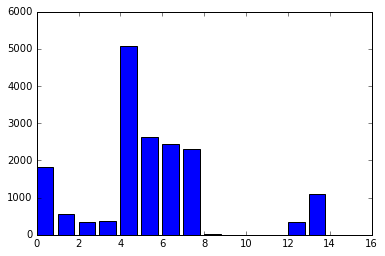

In [8]:
categories = ["Narrow Diagonal Signal (1)", "Narrow Diagonal Signal (1+)", "Narrow Horizontal Signal",
              "Narrow Vertical Signal (1)", "Narrow Vertical Signal (even)", "Narrow Vertical Signal (inf)",
              "Wide Diagonal Signal (1)", "Wide Diagonal Signal (1+)", "Wide Horizontal Signal",
              "Wide Vertical Signal (1)", "Wide Vertical Signal (even)", "Wide Vertical Signal (inf)",
              "No Signal", "Combination Signal", "Signal of Interest"]

calculation = [len(n_diagonal_1), len(n_diagonal_1p), len(n_horizontal), len(n_vertical_1), len(n_vertical_even),
              len(n_vertical_inf), len(w_diagonal_1), len(w_diagonal_1p), len(w_horizontal), len(w_vertical_1), 
              len(w_vertical_even), len(w_vertical_inf), len(no_sig), len(comb), len(soi)]

for x in range(len(categories)):
    print(str(x) + ": " + categories[x] + ": " + str(calculation[x]) + " / Percentage: " + str(calculation[x] / len(d) * 100) + "%")
plt.bar(range(15), calculation)
plt.show()